In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importando o arquivo csv
filename='top50.csv'
dados=pd.read_csv(filename,encoding='ISO-8859-1')

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [4]:
# Verificando se há dados duplicados
dados.duplicated().value_counts()

False    50
dtype: int64

Temos 14 colunas no nosso conjunto de dados. Também podemos observar que não temos nenhum dado nulo ou duplicado, portanto não será necessário fazer nenhum tratamento nesse momento.

In [5]:
# Verificando as 10 primeiras linhas
dados.head(10)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [6]:
# Deletando a coluna "Unnamed: 0"
db = dados.drop(columns = ['Unnamed: 0'])

In [7]:
# Verificando as colunas
db.columns

Index(['Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [8]:
# Renomeando as colunas, retirando os ".", para facilitar as análises
db.columns=['TrackName','ArtistName','Genre','BeatsPerMinute','Energy','Danceability','LoudnessdB','Liveness','Valence','Lengh','Acousticness','Speechiness','Popularity']

### **Dicionário das Colunas**:
*   **TrackName**: título da música
*   **ArtistName**: nome do artista
*   **Genre**: gênero da música
*   **BeatsPerMinute**: batidas por minuto
*   **Energy**: quanto maior o valor, mais "enérgica" é a música
*   **Danceability**: quanto maior o valor, mais "dançante" é a música
*   **LoudnessdB**: quanto maior o valor, mais alta é a música
*   **Liveness**: quanto maior o valor, maior a probabilidade da música ser uma gravação ao vivo
*   **Valence**: quanto maior o valor, mais "positiva" é a música 
*   **Length**: tempo de duração da música em segundos
*   **Acousticness**: quanto maior o valor, mais "acústica" é a música
*   **Speechiness**: quanto maior o valor, mais palavras faladas a música contém
*   **Popularity**: quanto maior o valor, mais popular a musica é

In [9]:
db.describe()

,BeatsPerMinute,Energy,Danceability,LoudnessdB,Liveness,Valence,Lengh,Acousticness,Speechiness,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


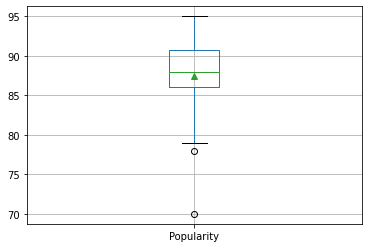

In [10]:
boxplot = db.boxplot(column=['Popularity'],
showmeans=True)


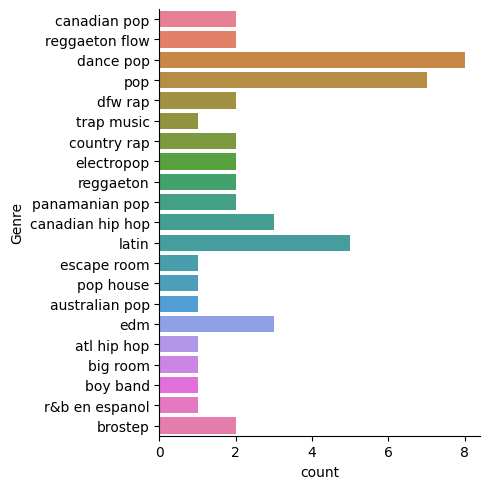

In [11]:
# Analisando os gêneros
sns.catplot(data = db, y = 'Genre', kind = 'count', palette = 'husl')

In [20]:
from collections import Counter
Counter(db['Genre'].values).most_common(5)

[('dance pop', 8),
 ('pop', 7),
 ('latin', 5),
 ('canadian hip hop', 3),
 ('edm', 3)]

Analisando os gêneros musicais, o mais popular em 2019 foi "Dance Pop" (8 músicas), seguindo por "Pop" (7 músicas) e "Latin" (5 músicas). Ou seja, 40% das músicas mais tocadas no ano são destes três gêneros.

In [24]:
# Analisando os artistas
db['ArtistName'].value_counts()

Ed Sheeran          4
Billie Eilish       2
J Balvin            2
Shawn Mendes        2
Marshmello          2
The Chainsmokers    2
Post Malone         2
Ariana Grande       2
Lil Nas X           2
Sech                2
MEDUZA              1
Anuel AA            1
Bad Bunny           1
Jonas Brothers      1
Chris Brown         1
Jhay Cortez         1
Tones and I         1
Khalid              1
DJ Snake            1
Lady Gaga           1
Drake               1
Lewis Capaldi       1
Y2K                 1
Nicky Jam           1
ROSALÍA             1
Lizzo               1
Kygo                1
Lil Tecca           1
Ali Gatie           1
Maluma              1
Young Thug          1
Katy Perry          1
Martin Garrix       1
Taylor Swift        1
Sam Smith           1
Lunay               1
Daddy Yankee        1
Lauv                1
Name: ArtistName, dtype: int64

In [25]:
# Verificando a quantidade de artistas únicos
len(db['ArtistName'].unique())

38

Já com relação aos artistas, "Ed Sheeran" possui 4 músicas entre as 50 mais ouvidas. Também temos 9 artistas, como "Shawn Mendes" e "Lil Nas X", que aparecem com duas músicas na listas. As demais 28 músicas são de artistas diferentes. 
No total temos 38 artistas diferentes.

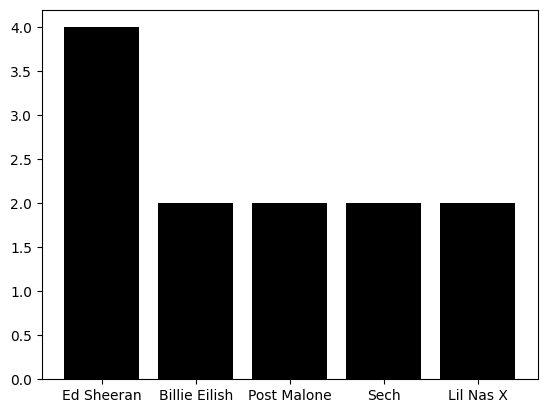

In [45]:
# 5 Artistas mais tocados
bar_plot = dict(Counter(db['ArtistName'].values).most_common(5))
plt.bar(*zip(*bar_plot.items()), align='center', color='black')
plt.show()

In [43]:
# Analisando as músicas mais populares
db.sort_values('Popularity', ascending= False, inplace = True)
db.head(10)


,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,LoudnessdB,Liveness,Valence,Lengh,Acousticness,Speechiness,Popularity
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
10,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
14,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,101,50,83,-4,12,10,205,10,5,92
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
36,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91
21,Panini,Lil Nas X,country rap,154,59,70,-6,12,48,115,34,8,91
20,Piece Of Your Heart,MEDUZA,pop house,124,74,68,-7,7,63,153,4,3,91
19,Truth Hurts,Lizzo,escape room,158,62,72,-3,12,41,173,11,11,91


**Quais os artistas mais ouvidos?**<br>
Os 10 artistas mais ouvidos são: Ed Sheeran, Shawn Mendes, Lil Nas X, J Balvin, Sech, Billie Eilish, The Chainsmokers, Marshmello, Post Malone e Ariana Grande.

**Quais os gêneros mais populares?**<br>
40% das músicas são de Dance Pop, Pop ou Latin.

**Qual foi a música mais ouvida em 2019?**<br>
A música mais popular em 2019 foi "Bad Guy" da Billie Eilish, com 95 de popularidade.